<div style="text-align:center">
<h1 style="text-align:center">Employee dataset</h1>
<h4>Employee data for classification task</h4>
</div>
<br>
<img src = "https://www.tpghrservices.com/wp-content/uploads/employee-resignations-Header-1024x614.jpg" width="650" height="750">
<div class="sc-gKcDQK gVfUPR sc-gSLeDg bhGMWj"><p><strong>Context:</strong><br>
This dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors. It has been anonymized to protect privacy while still providing valuable insights into the workforce.</p>
<p><strong>Columns:</strong></p>
<ol>
<li><p><strong>Education:</strong> The educational qualifications of employees, including degree, institution, and field of study.</p></li>
<li><p><strong>Joining Year:</strong> The year each employee joined the company, indicating their length of service.</p></li>
<li><p><strong>City:</strong> The location or city where each employee is based or works.</p></li>
<li><p><strong>Payment Tier:</strong> Categorization of employees into different salary tiers.</p></li>
<li><p><strong>Age:</strong> The age of each employee, providing demographic insights.</p></li>
<li><p><strong>Gender:</strong> Gender identity of employees, promoting diversity analysis.</p></li>
<li><p><strong>Ever Benched:</strong> Indicates if an employee has ever been temporarily without assigned work.</p></li>
<li><p><strong>Experience in Current Domain:</strong> The number of years of experience employees have in their current field.</p></li>
<li><p><strong>Leave or Not:</strong> a target column</p></li>
</ol>
<p><strong>Usage:</strong><br>
This dataset can be used for various HR and workforce-related analyses, including employee retention, salary structure assessments, diversity and inclusion studies, and leave pattern analyses. Researchers, data analysts, and HR professionals can gain valuable insights from this dataset.</p>
<p><strong>Potential Research Questions:</strong></p>
<ol>
<li>What is the distribution of educational qualifications among employees?</li>
<li>How does the length of service (Joining Year) vary across different cities?</li>
<li>Is there a correlation between Payment Tier and Experience in Current Domain?</li>
<li>What is the gender distribution within the workforce?</li>
<li>Are there any patterns in leave-taking behavior among employees?</li>
</ol>
<p><strong>Acknowledgments:</strong><br>
We would like to acknowledge the contributions of our HR department in providing this dataset for research and analysis purposes.</p></div>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
emp_data = pd.read_csv("Employee.csv")

In [5]:
emp_data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [6]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
emp_data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


<Axes: >

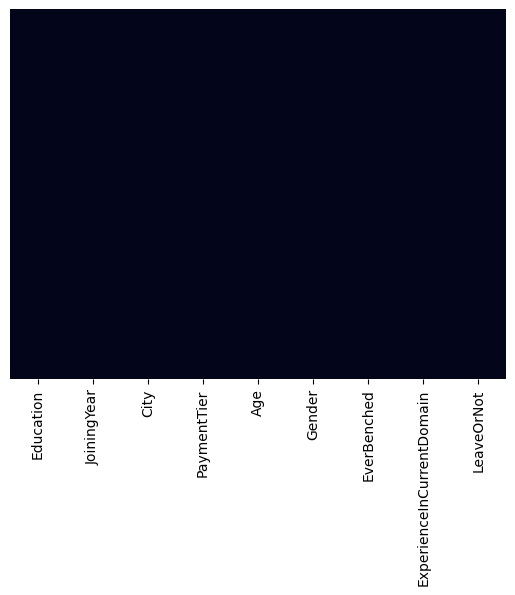

In [11]:
sns.heatmap(emp_data.isnull(), cbar=False, yticklabels=False)

<Axes: xlabel='Age', ylabel='count'>

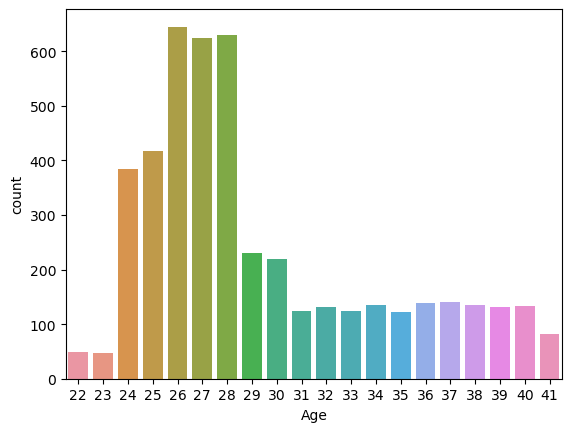

In [13]:
sns.countplot(data=emp_data,x="Age")

<Axes: xlabel='Age', ylabel='count'>

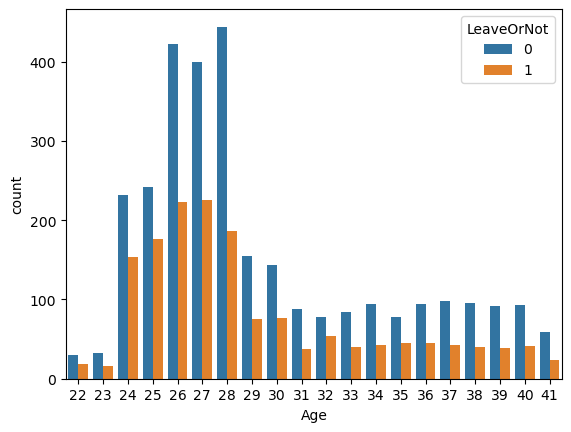

In [14]:
sns.countplot(data=emp_data,x="Age", hue="LeaveOrNot")

<h4>1. What is the distribution of educational qualifications among employees?<h4>

<Axes: xlabel='Education', ylabel='count'>

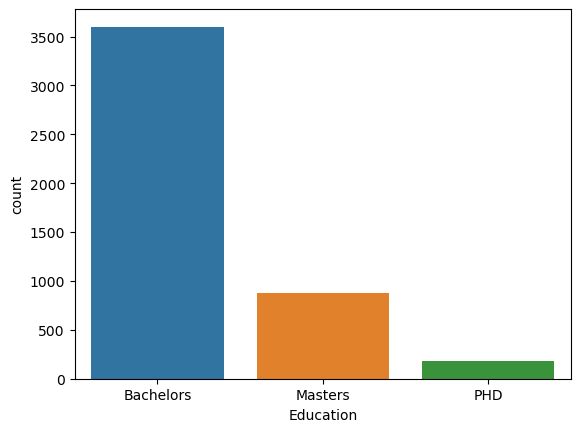

In [16]:
sns.countplot(emp_data, x="Education")

<Axes: xlabel='Education', ylabel='count'>

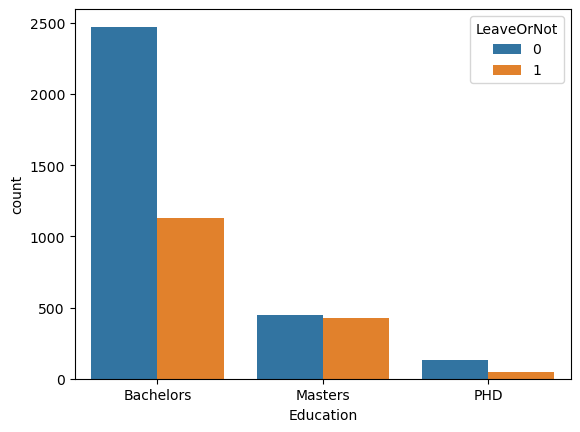

In [17]:
sns.countplot(emp_data, x="Education", hue="LeaveOrNot")

<h4>2. How does the length of service (Joining Year) vary across different cities?</h4>

In [55]:
emp_data['JoiningYear'] = pd.to_datetime(emp_data['JoiningYear']).apply(lambda x : x.year)

<Axes: xlabel='JoiningYear', ylabel='Count'>

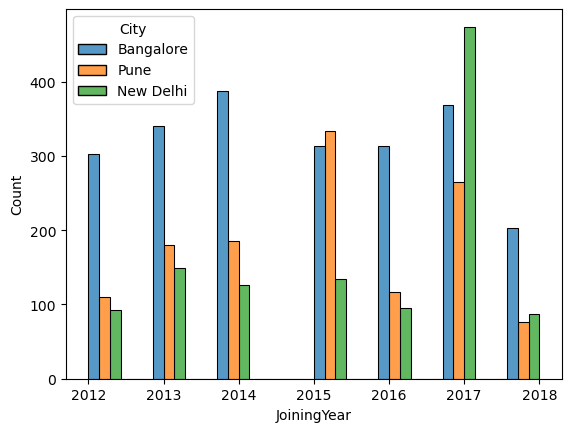

In [67]:
sns.histplot(emp_data, x="JoiningYear", hue="City", multiple="dodge")

<Axes: xlabel='JoiningYear', ylabel='Density'>

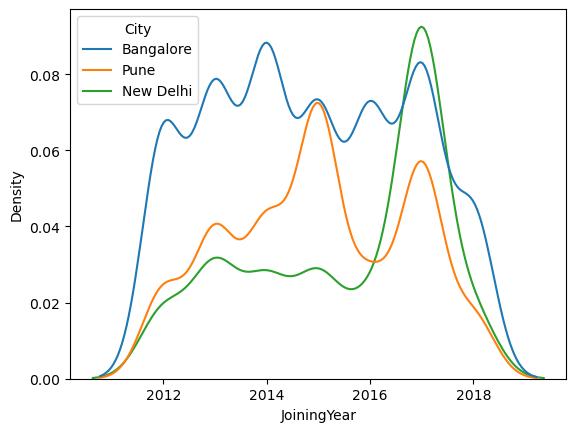

In [68]:
sns.kdeplot(emp_data, x="JoiningYear", hue="City")

<h4>3. Is there a correlation between Payment Tier and Experience in Current Domain?</h4>

<Axes: xlabel='PaymentTier', ylabel='ExperienceInCurrentDomain'>

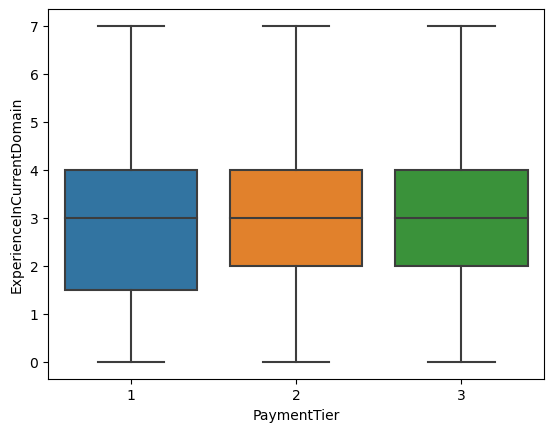

In [73]:
sns.boxplot(emp_data, x="PaymentTier", y="ExperienceInCurrentDomain")

<Axes: xlabel='PaymentTier', ylabel='ExperienceInCurrentDomain'>

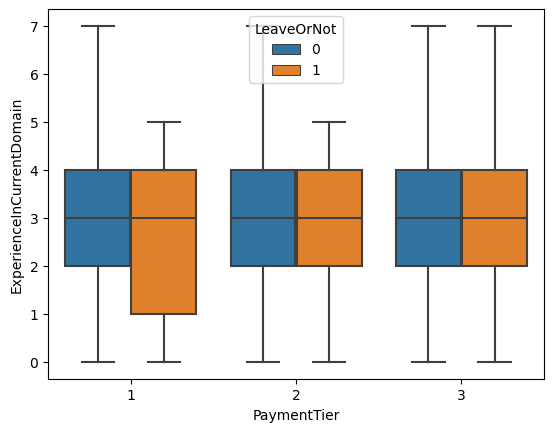

In [76]:
sns.boxplot(emp_data, x="PaymentTier", y="ExperienceInCurrentDomain", hue="LeaveOrNot")

<Axes: xlabel='PaymentTier', ylabel='count'>

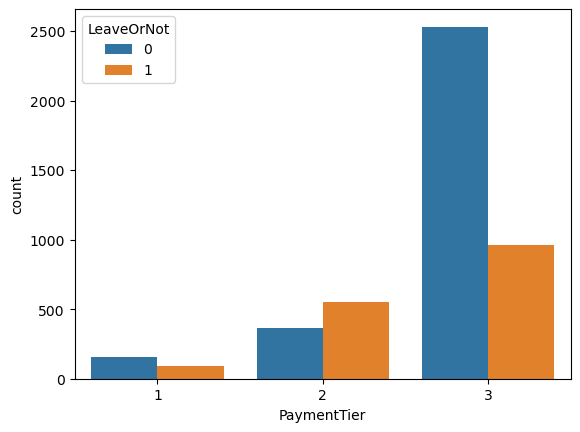

In [84]:
sns.countplot(emp_data, x="PaymentTier",  hue="LeaveOrNot")

<h4>4. What is the gender distribution within the workforce?</h4>

<Axes: xlabel='Gender', ylabel='count'>

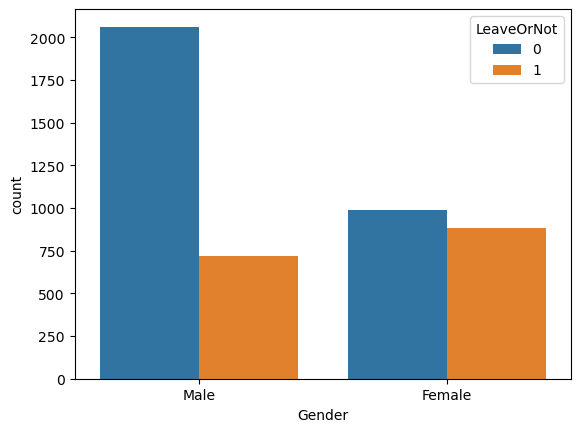

In [82]:
sns.countplot(emp_data, x="Gender", hue="LeaveOrNot")

<Axes: xlabel='count', ylabel='Gender'>

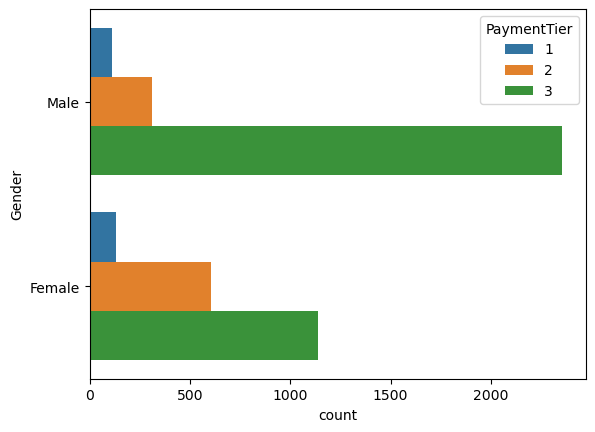

In [80]:
sns.countplot(emp_data, y="Gender", hue="PaymentTier")

In [97]:
city = pd.get_dummies(emp_data['City'], drop_first=True)

In [98]:
education = pd.get_dummies(emp_data["Education"], drop_first=True)

In [102]:
gender = pd.get_dummies(emp_data["Gender"], drop_first=True)

In [105]:
everbenched = pd.get_dummies(emp_data["EverBenched"], drop_first=True)

In [107]:
cols_to_drop = ["Education", "City", "Gender", "EverBenched"]
emp_df = pd.concat((emp_data.drop(cols_to_drop, axis = 1), city, education, gender, everbenched), axis=1) 

In [111]:
emp_df.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,New Delhi,Pune,Masters,PHD,Male,Yes
0,2017,3,34,0,0,0,0,0,0,1,0
1,2013,1,28,3,1,0,1,0,0,0,0
2,2014,3,38,2,0,1,0,0,0,0,0
3,2016,3,27,5,1,0,0,1,0,1,0
4,2017,3,24,2,1,0,1,1,0,1,1


In [110]:
scale = StandardScaler()

In [112]:
scale.fit(emp_df.drop("LeaveOrNot", axis=1))

StandardScaler()

In [115]:
X_data = scale.transform(emp_df.drop("LeaveOrNot", axis=1))

In [117]:
X = pd.DataFrame(X_data,columns=emp_df.drop("LeaveOrNot", axis=1).columns)
y = emp_df["LeaveOrNot"]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [121]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [122]:
prediction = knn.predict(X_test)

In [126]:
print(confusion_matrix(prediction, y_test))
print(classification_report(prediction, y_test))

[[929 203]
 [ 75 329]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1132
           1       0.62      0.81      0.70       404

    accuracy                           0.82      1536
   macro avg       0.77      0.82      0.79      1536
weighted avg       0.84      0.82      0.83      1536



In [139]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    
    error_rate.append(np.mean(abs(prediction - y_test)))

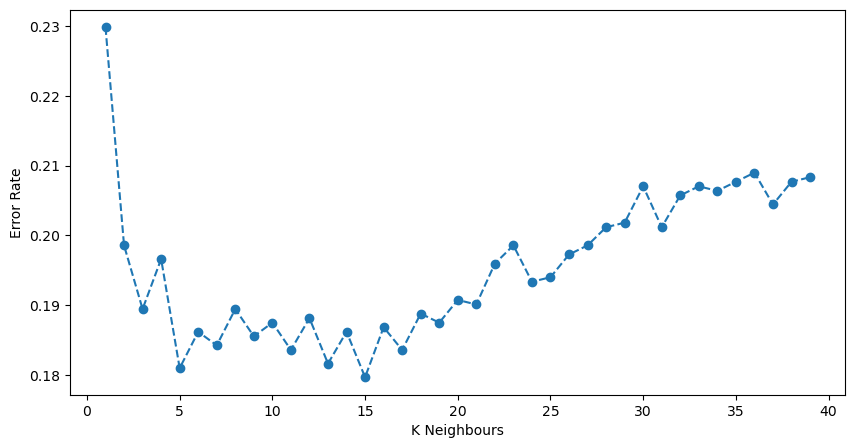

In [140]:
plt.figure(figsize=(10, 5))
plt.plot(range(1,40),error_rate, linestyle='--', marker='o')
plt.xlabel("K Neighbours")
plt.ylabel("Error Rate")
plt.show()

In [135]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

In [136]:
print(confusion_matrix(prediction, y_test))
print(classification_report(prediction, y_test))

[[959 231]
 [ 45 301]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.87      1190
           1       0.57      0.87      0.69       346

    accuracy                           0.82      1536
   macro avg       0.76      0.84      0.78      1536
weighted avg       0.87      0.82      0.83      1536

